## Load libraries

In [1]:
%%configure -f
{"driverMemory": "6000M"}

In [2]:
# Import and initiate HAIL
import hail as hl
hl.init(sc)

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1661993673941_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

pip-installed Hail requires additional configuration options in Spark referring
  to the path to the Hail Python module directory HAIL_DIR,
  e.g. /path/to/python/site-packages/hail:
    spark.jars=HAIL_DIR/hail-all-spark.jar
    spark.driver.extraClassPath=HAIL_DIR/hail-all-spark.jar
    spark.executor.extraClassPath=./hail-all-spark.jarRunning on Apache Spark version 3.1.2-amzn-0
SparkUI available at http://ip-192-168-97-104.ap-southeast-1.compute.internal:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.80-4ccfae1ff293
LOGGING: writing to /mnt/var/lib/livy/hail-20220901-0157-0.2.80-4ccfae1ff293.log

In [3]:
# Utils
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Load Dataset

In [4]:
## Path of SG10K_Health release
# Expect *.samples.ht
# Expect *.sites.ht
# Expect *.genotypes.mt
path = './'
## Path for temporary files
tmp_path = './'
##

version = 'SG10K_Health_r5.3'

# Load SG10K_Health
ht_samples = hl.read_table(path + 'SG10K_Health_r5.3.1.n9770.samples.ht')
ht_sites = hl.read_table(path + 'SG10K_Health_r5.3.2.n9770.sites.ht')
mt_g = hl.read_matrix_table(path + 'SG10K_Health_r5.3.0.n9770.genotypes.mt')

# Counts
n_samples = ht_samples.count()
n_sites = ht_sites.count()

print('{}: {} samples - {} sites'.format(version, f'{n_samples:,}', f'{n_sites:,}'))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SG10K_Health_r5.3: 9,770 samples - 179,418,917 sites

## Distribution of sample by cohorts

In [5]:
# Clear plt
plt.clf()
plt.cla()

# Extract data
df = ht_samples.select(ht_samples.dgo_meta.cohort_name).to_pandas()
ax = sns.countplot(x="cohort_name", data=df)
ax.bar_label(ax.containers[0], labels=[f'{x:,.0f}'+' ('+f'{x/n_samples:.0%}'+')' for x in ax.containers[0].datavalues])

# # Display in the next cell with sparkmagic

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Text(0, 0, '1,257 (13%)'), Text(0, 0, '2,902 (30%)'), Text(0, 0, '920 (9%)'), Text(0, 0, '2,286 (23%)'), Text(0, 0, '969 (10%)'), Text(0, 0, '1,436 (15%)')]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

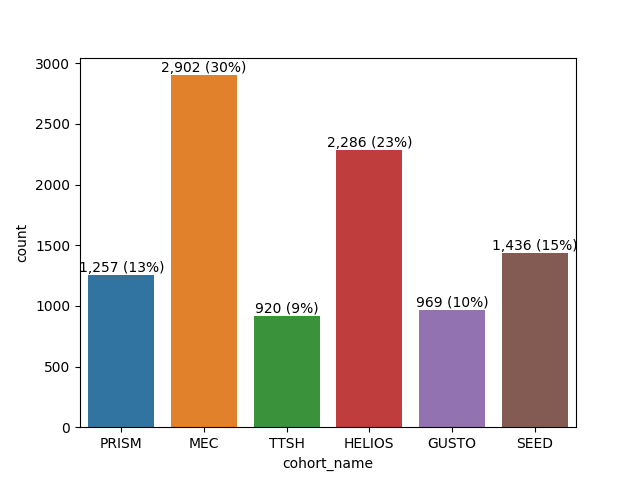

In [58]:
%matplot plt

## Distribution of sample by gender

In [60]:
# Clear plt
plt.clf()
plt.cla()
# Color map
palette={"male": "#1f77b4", "female": "#e377c2"}

# Extract data
df = ht_samples.select(ht_samples.grids_meta.sex).to_pandas()
ax = sns.countplot(x="sex", data=df, palette=palette)
ax.bar_label(ax.containers[0], labels=[f'{x:,.0f}'+' ('+f'{x/n_samples:.0%}'+')' for x in ax.containers[0].datavalues])

# # Display in the next cell with sparkmagic

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Text(0, 0, '4,108 (42%)'), Text(0, 0, '5,662 (58%)')]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

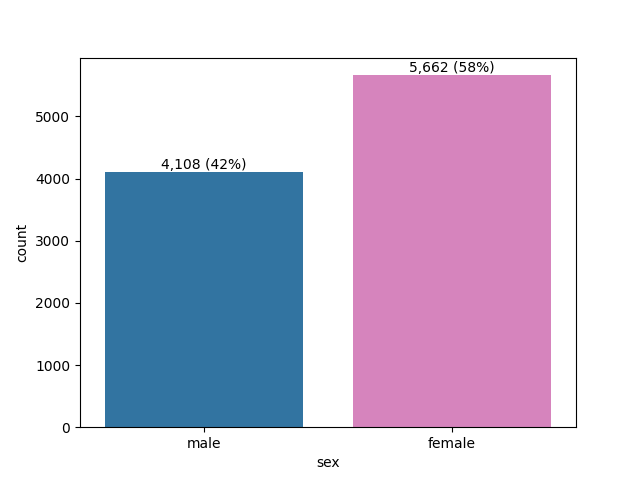

In [61]:
%matplot plt

## Distribution of sample by ethnicity

In [66]:
# Ethnicity

# Clear plt
plt.clf()
plt.cla()
# Color map
palette={"Chinese": "#d62728", "Malay": "#2ca02c", "Indian": "#9467bd", "Others": "#1f77b4"}
# Extract data
df = ht_samples.select(ht_samples.dgo_meta.sr_ethnicity).to_pandas()
ax = sns.countplot(x="sr_ethnicity", data=df, palette=palette)
ax.bar_label(ax.containers[0], labels=[f'{x:,.0f}'+' ('+f'{x/n_samples:.0%}'+')' for x in ax.containers[0].datavalues])

# # Display in the next cell with sparkmagic

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Text(0, 0, '5,701 (58%)'), Text(0, 0, '1,905 (19%)'), Text(0, 0, '2,134 (22%)'), Text(0, 0, '30 (0%)')]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

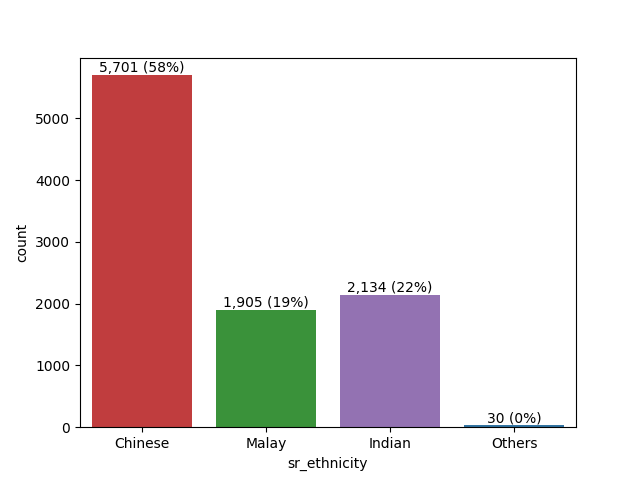

In [67]:
%matplot plt

## Distribution of sample by age
Age at collection is not available but year of birth can be used as proxy.

In [63]:
# Year

# Clear plt
plt.clf()
plt.cla()

# Extract data
df = ht_samples.select(ht_samples.dgo_meta.sr_year).to_pandas()
df['age']= date.today().year - df['sr_year'].astype(int)
ax = sns.histplot(data=df, x="age", bins=[0,10,20,30,40,50,60,70,80,90,100])
ax.bar_label(ax.containers[0], labels=[f'{x:,.0f}'+' ('+f'{x/n_samples:.0%}'+')' for x in ax.containers[0].datavalues])

# # Display in the next cell with sparkmagic

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Text(0, 0, '0 (0%)'), Text(0, 0, '969 (10%)'), Text(0, 0, '66 (1%)'), Text(0, 0, '750 (8%)'), Text(0, 0, '1,272 (13%)'), Text(0, 0, '1,990 (20%)'), Text(0, 0, '2,974 (30%)'), Text(0, 0, '1,351 (14%)'), Text(0, 0, '336 (3%)'), Text(0, 0, '61 (1%)')]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

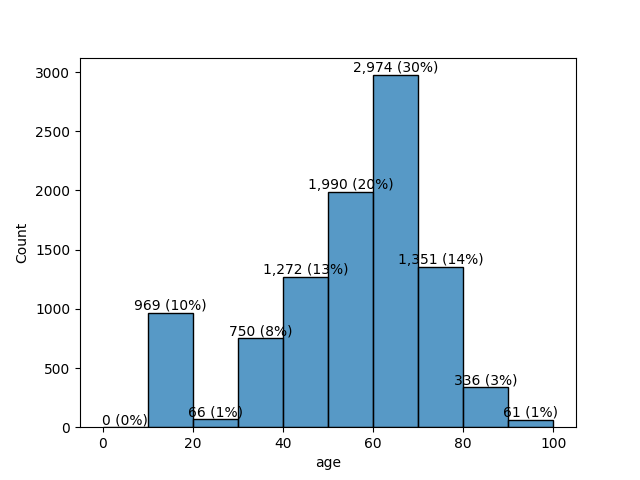

In [64]:
%matplot plt

## Number of variants

In [7]:
# From GnomAD: https://github.com/macarthur-lab/gnomadjs/blob/master/data/gnomad_r3/prepare_gnomad_r3_variants.py

# Consequence terms in order of severity (more severe to less severe) as estimated by Ensembl.
# See https://ensembl.org/info/genome/variation/prediction/predicted_data.html
CONSEQUENCE_TERMS = [
    "transcript_ablation",
    "splice_acceptor_variant",
    "splice_donor_variant",
    "stop_gained",
    "frameshift_variant",
    "stop_lost",
    "start_lost",  # new in v81
    "initiator_codon_variant",  # deprecated
    "transcript_amplification",
    "inframe_insertion",
    "inframe_deletion",
    "missense_variant",
    "protein_altering_variant",  # new in v79
    "splice_region_variant",
    "incomplete_terminal_codon_variant",
    "start_retained_variant",
    "stop_retained_variant",
    "synonymous_variant",
    "coding_sequence_variant",
    "mature_miRNA_variant",
    "5_prime_UTR_variant",
    "3_prime_UTR_variant",
    "non_coding_transcript_exon_variant",
    "non_coding_exon_variant",  # deprecated
    "intron_variant",
    "NMD_transcript_variant",
    "non_coding_transcript_variant",
    "nc_transcript_variant",  # deprecated
    "upstream_gene_variant",
    "downstream_gene_variant",
    "TFBS_ablation",
    "TFBS_amplification",
    "TF_binding_site_variant",
    "regulatory_region_ablation",
    "regulatory_region_amplification",
    "feature_elongation",
    "regulatory_region_variant",
    "feature_truncation",
    "intergenic_variant",
]

# hail DictExpression that maps each CONSEQUENCE_TERM to its rank in the list
CONSEQUENCE_TERM_RANK_LOOKUP = hl.dict({term: rank for rank, term in enumerate(CONSEQUENCE_TERMS)})

OMIT_CONSEQUENCE_TERMS = hl.set(["upstream_gene_variant", "downstream_gene_variant"])

def consequence_term_rank(consequence_term):
    return CONSEQUENCE_TERM_RANK_LOOKUP.get(consequence_term)

def sorted_transcript_consequences_v4(vep_root):
    """
    Sort transcripts by 3 properties:
        1. coding > non-coding
        2. transcript consequence severity
        3. canonical > non-canonical
    For each transcript consequence in the array, adds these fields:
        * major_consequence: set to most severe consequence for that transcript
            (VEP sometimes provides multiple consequences for a single transcript)
    and modifies these:
        * canonical: converts integer field to boolean
        * domains: converts structs with db/name fields to string db:name
        * gene_id: converts ENSG string to integer
        * hgvsc: removes transcript ID
        * hgvsp: removes transcript ID, formats for synonymous variants
        * transcript_id: converts ENST string to integer
    Args:
        vep_root (StructExpression): root path of the VEP struct in the MT
    """

    # Extract consequences
    # Keep only Ensembl transcripts
    consequences = vep_root.transcript_consequences.filter(lambda x: x.source == 'Ensembl')

    # Drop irrelevant consequences
    consequences = consequences.map(
        lambda c: c.annotate(
            consequence_terms=c.consequence_terms.filter(lambda t: ~OMIT_CONSEQUENCE_TERMS.contains(t))
        )
    ).filter(lambda c: c.consequence_terms.size() > 0)

    # Add derived fields
    consequences = consequences.map(
        lambda c: c.annotate(major_consequence=hl.sorted(c.consequence_terms, key=consequence_term_rank)[0])
    ).map(
        lambda c: c.annotate(
            canonical=hl.bool(c.canonical),
        )
    )

    # Sort
    consequences = hl.sorted(
        consequences,
        lambda c: (
            hl.bind(
                lambda is_coding, is_most_severe, is_canonical: (
                    hl.cond(
                        is_coding,
                        hl.cond(is_most_severe, hl.cond(is_canonical, 1, 2), hl.cond(is_canonical, 3, 4)),
                        hl.cond(is_most_severe, hl.cond(is_canonical, 5, 6), hl.cond(is_canonical, 7, 8)),
                    )
                ),
                hl.or_else(c.biotype, "") == "protein_coding",
                c.major_consequence == vep_root.most_severe_consequence,
                hl.or_else(c.canonical, False),
            )
        ),
    )

    # Select fields
    consequences = consequences.map(
        lambda c: c.select(
            "canonical",
            "consequence_terms",
            "domains",
            "gene_id",
            "gene_symbol",
            "hgvsc",
            "hgvsp",
            "lof_filter",
            "lof_flags",
            "lof",
            "major_consequence",
            "polyphen_prediction",
            "sift_prediction",
            "transcript_id",
            "protein_id",
            "swissprot",
            "trembl",
            "uniparc"
        )
    )

    return consequences

###
# From A*STAR - GIS - GRIDS
###
    
def format_variants_table(ds):
    ds = ds.annotate(
        sorted_transcript_consequences = sorted_transcript_consequences_v4(ds.vep),
        variant_class = ds.vep.variant_class
    )
    ds = ds.drop("vep")
    return ds

def set_major_consequence(ds):
    ds = ds.annotate(
        major_consequence = hl.case()
        .when( ( 
            (ds.sorted_transcript_consequences.major_consequence[0] == "transcript_ablation") 
            | (ds.sorted_transcript_consequences.major_consequence[0] == "splice_acceptor_variant") 
            | (ds.sorted_transcript_consequences.major_consequence[0] == "splice_donor_variant") 
            | (ds.sorted_transcript_consequences.major_consequence[0] == "stop_gained") 
            | (ds.sorted_transcript_consequences.major_consequence[0] == "frameshift_variant")
        ), "LoF" )
        .when( (
            (ds.sorted_transcript_consequences.major_consequence[0] == "stop_lost") 
            | (ds.sorted_transcript_consequences.major_consequence[0] == "start_lost") 
            | (ds.sorted_transcript_consequences.major_consequence[0] == "inframe_insertion") 
            | (ds.sorted_transcript_consequences.major_consequence[0] == "inframe_deletion") 
            | (ds.sorted_transcript_consequences.major_consequence[0] == "missense_variant")
        ), "missense" )
        .when(ds.sorted_transcript_consequences.major_consequence[0] == "synonymous_variant", "synonymous")
        .default("other")
    )
    # Annotate LoF HC
    ds = ds.annotate(
        hc_lof = (ds.major_consequence == "LoF") & (ds.sorted_transcript_consequences.lof[0] == "HC")
    )
    return ds

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Number of variant in SG10K_Health

In [8]:
# Sort transcript_consequences
ht_sort = ht_sites.select('vep')
ht_sort = format_variants_table(ht_sort)
# Set major_consequence
ht_mc = ht_sort.filter(ht_sort.sorted_transcript_consequences.length() > 0 )
ht_mc = set_major_consequence(ht_mc)
# Consolidate
ht_csq = ht_sort.annotate(
    major_consequence = ht_mc[ht_sort.key].major_consequence,
    hc_lof = ht_mc[ht_sort.key].hc_lof,
)
ht_csq.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

179418917

In [39]:
# Aggregation
classes = ht_csq.aggregate(hl.agg.counter(ht_csq.variant_class))
csq = ht_csq.aggregate(hl.agg.counter(ht_csq.major_consequence))
lof = ht_csq.aggregate(hl.agg.counter(ht_csq.hc_lof))
# Count
n_snv = classes['SNV']
n_indel = classes['deletion'] + classes['insertion']
n_var = n_snv + n_indel
n_syn = csq['synonymous']
n_mis = csq['missense']
n_lof = csq['LoF']
n_hc = lof[True]
n_csq = n_syn + n_mis + n_lof
# Print
print('Total Number of variants', f'{n_var:,}')
print('---')
print('Number of SNVs', f'{n_snv:,}', f'{n_snv/n_var:.0%}')
print('Number of INDELs', f'{n_indel:,}', f'{n_indel/n_var:.0%}')
print('---')
print('Number with functional prediction', f'{n_csq:,}', f'{n_csq/n_var:.0%}')
print('Number of Synonymous', f'{n_syn:,}', f'{n_syn/n_csq:.0%}')
print('Number of Missense', f'{n_mis:,}', f'{n_mis/n_csq:.0%}')
print('Number of Loss of Function', f'{n_lof:,}', f'{n_lof/n_csq:.0%}')
print('Number of LoF High Confidence', f'{n_hc:,}', f'{n_hc/n_csq:.0%}')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Number of variants 179,418,917
---
Number of SNVs 158,331,366 88%
Number of INDELs 21,087,551 12%
---
Number with functional prediction 1,847,487 1%
Number of Synonymous 595,783 32%
Number of Missense 1,147,135 62%
Number of Loss of Function 104,569 6%
Number of LoF High Confidence 63,224 3%

## Number of variants with MAF < 1%

In [41]:
# Filters
ht_rare = ht_sites.filter(
    (ht_sites.variant_qc.AF[1] < 0.01)
    | (ht_sites.variant_qc.AF[0] < 0.01)
)
# Consolidate
ht_rare = ht_rare.annotate(
    variant_class = ht_csq[ht_rare.key].variant_class,
    major_consequence = ht_csq[ht_rare.key].major_consequence,
    hc_lof = ht_csq[ht_rare.key].hc_lof,
)
# Aggregation
classes = ht_rare.aggregate(hl.agg.counter(ht_rare.variant_class))
csq = ht_rare.aggregate(hl.agg.counter(ht_rare.major_consequence))
lof = ht_rare.aggregate(hl.agg.counter(ht_rare.hc_lof))
# Count
n_snv = classes['SNV']
n_indel = classes['deletion'] + classes['insertion']
n_var = n_snv + n_indel
n_syn = csq['synonymous']
n_mis = csq['missense']
n_lof = csq['LoF']
n_hc = lof[True]
n_csq = n_syn + n_mis + n_lof
# Print
print('Total Number of variants', f'{n_var:,}')
print('---')
print('Number of SNVs', f'{n_snv:,}', f'{n_snv/n_var:.0%}')
print('Number of INDELs', f'{n_indel:,}', f'{n_indel/n_var:.0%}')
print('---')
print('Number with functional prediction', f'{n_csq:,}', f'{n_csq/n_var:.0%}')
print('Number of Synonymous', f'{n_syn:,}', f'{n_syn/n_csq:.0%}')
print('Number of Missense', f'{n_mis:,}', f'{n_mis/n_csq:.0%}')
print('Number of Loss of Function', f'{n_lof:,}', f'{n_lof/n_csq:.0%}')
print('Number of LoF High Confidence', f'{n_hc:,}', f'{n_hc/n_csq:.0%}')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Number of variants 166,559,124
---
Number of SNVs 148,665,318 89%
Number of INDELs 17,893,806 11%
---
Number with functional prediction 1,783,496 1%
Number of Synonymous 566,740 32%
Number of Missense 1,114,839 63%
Number of Loss of Function 101,917 6%
Number of LoF High Confidence 62,324 3%

## Median variant per genome

In [9]:
# Consolidate
mt_g = mt_g.annotate_rows(
    variant_class = ht_csq[mt_g.row_key].variant_class,
    major_consequence = ht_csq[mt_g.row_key].major_consequence,
    hc_lof = ht_csq[mt_g.row_key].hc_lof,
)
# Aggregation
ht_cols = mt_g.annotate_cols(
    n_non_ref = hl.agg.count_where( mt_g.GT.is_non_ref() ),
    n_snv = hl.agg.count_where( (mt_g.GT.is_non_ref()) & (mt_g.variant_class == "SNV") ),
    n_indel = hl.agg.count_where( (mt_g.GT.is_non_ref()) & ( (mt_g.variant_class == "deletion") | (mt_g.variant_class == "insertion") ) ),
    n_synonymous = hl.agg.count_where( (mt_g.GT.is_non_ref()) & (mt_g.major_consequence == "synonymous") ),
    n_missense = hl.agg.count_where( (mt_g.GT.is_non_ref()) & (mt_g.major_consequence == "missense") ),
    n_lof = hl.agg.count_where( (mt_g.GT.is_non_ref()) & (mt_g.major_consequence == "LoF") ),
    n_hc_lof = hl.agg.count_where( (mt_g.GT.is_non_ref()) & (mt_g.hc_lof == True) ),
    ).cols()

# Write
ht_cols.write(tmp_path + version + '.cat-per-genome.cols.ht')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

9770
2022-08-31 00:51:50 Hail: WARN: cols(): Resulting column table is sorted by 'col_key'.
    To preserve matrix table column order, first unkey columns with 'key_cols_by()'
2022-08-31 01:47:53 Hail: INFO: Coerced sorted dataset
2022-08-31 01:47:55 Hail: INFO: wrote table with 9770 rows in 16 partitions to s3://npm-grids/hebrardms/SG10K_Health_r5.3.cat-per-genome.cols.ht

In [10]:
# Read annotated cols
ht_spg = hl.read_table(tmp_path + version + '.cat-per-genome.cols.ht')
ht_spg.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

9770

In [18]:
# Aggregations
s_var = ht_spg.aggregate(hl.agg.stats(ht_spg.n_non_ref))
s_snv = ht_spg.aggregate(hl.agg.stats(ht_spg.n_snv))
s_indel = ht_spg.aggregate(hl.agg.stats(ht_spg.n_indel)) 
s_syn = ht_spg.aggregate(hl.agg.stats(ht_spg.n_synonymous)) 
s_mis = ht_spg.aggregate(hl.agg.stats(ht_spg.n_missense)) 
s_lof = ht_spg.aggregate(hl.agg.stats(ht_spg.n_lof)) 
s_hc = ht_spg.aggregate(hl.agg.stats(ht_spg.n_hc_lof)) 
# Print
print('Total Number of variants', f'{s_var.mean:,.0f}', '+/-', f'{s_var.stdev:,.2f}')
print('---')
print('Number of SNVs', f'{s_snv.mean:,.0f}', '+/-', f'{s_snv.stdev:,.2f}')
print('Number of INDELs', f'{s_indel.mean:,.0f}', '+/-', f'{s_indel.stdev:,.2f}')
print('---')
print('Number with functional prediction ...')
print('Number of Synonymous', f'{s_syn.mean:,.0f}', '+/-', f'{s_syn.stdev:,.2f}')
print('Number of Missense', f'{s_mis.mean:,.0f}', '+/-', f'{s_mis.stdev:,.2f}')
print('Number of Loss of Function', f'{s_lof.mean:,.0f}', '+/-', f'{s_lof.stdev:,.2f}')
print('Number of LoF High Confidence', f'{s_hc.mean:,.0f}', '+/-', f'{s_hc.stdev:,.2f}')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Number of variants 4,102,580 +/- 207,880.84
---
Number of SNVs 3,502,953 +/- 129,196.16
Number of INDELs 599,627 +/- 84,126.35
---
Number with functional prediction ...
Number of Synonymous 10,912 +/- 405.29
Number of Missense 11,133 +/- 447.76
Number of Loss of Function 724 +/- 44.33
Number of LoF High Confidence 208 +/- 19.62

## Median variant per genome with MAF < 1%

In [ ]:
# Filters
ht_rare = ht_sites.filter(
    (ht_sites.variant_qc.AF[1] < 0.01)
    | (ht_sites.variant_qc.AF[0] < 0.01)
)
mt_rare = mt_g.filter_rows( hl.is_defined(ht_rare[mt_g.row_key]) )

# Counts
ht_cols_rare = mt_rare.annotate_cols(
    n_non_ref = hl.agg.count_where( mt_rare.GT.is_non_ref() ),
    n_snv = hl.agg.count_where( (mt_rare.GT.is_non_ref()) & (mt_rare.variant_class == "SNV") ),
    n_indel = hl.agg.count_where( (mt_rare.GT.is_non_ref()) & ( (mt_rare.variant_class == "deletion") | (mt_rare.variant_class == "insertion") ) ),
    n_synonymous = hl.agg.count_where( (mt_rare.GT.is_non_ref()) & (mt_rare.major_consequence == "synonymous") ),
    n_missense = hl.agg.count_where( (mt_rare.GT.is_non_ref()) & (mt_rare.major_consequence == "missense") ),
    n_lof = hl.agg.count_where( (mt_rare.GT.is_non_ref()) & (mt_rare.major_consequence == "LoF") ),
    n_hc_lof = hl.agg.count_where( (mt_rare.GT.is_non_ref()) & (mt_rare.hc_lof == True) ),
    ).cols()

# Write & Read
ht_cols_rare.write(tmp_path + version + '.cat-per-genome.cols.rare.ht')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
# Read annotated cols
ht_spg_rare = hl.read_table(tmp_path + version + '.cat-per-genome.cols.rare.ht')
ht_spg_rare.count()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

9770

In [22]:
# Aggregations
s_var = ht_spg_rare.aggregate(hl.agg.stats(ht_spg_rare.n_non_ref))
s_snv = ht_spg_rare.aggregate(hl.agg.stats(ht_spg_rare.n_snv))
s_indel = ht_spg_rare.aggregate(hl.agg.stats(ht_spg_rare.n_indel)) 
s_syn = ht_spg_rare.aggregate(hl.agg.stats(ht_spg_rare.n_synonymous)) 
s_mis = ht_spg_rare.aggregate(hl.agg.stats(ht_spg_rare.n_missense)) 
s_lof = ht_spg_rare.aggregate(hl.agg.stats(ht_spg_rare.n_lof)) 
s_hc = ht_spg_rare.aggregate(hl.agg.stats(ht_spg_rare.n_hc_lof)) 
# Print
print('Total Number of variants', f'{s_var.mean:,.0f}', '+/-', f'{s_var.stdev:,.2f}')
print('---')
print('Number of SNVs', f'{s_snv.mean:,.0f}', '+/-', f'{s_snv.stdev:,.2f}')
print('Number of INDELs', f'{s_indel.mean:,.0f}', '+/-', f'{s_indel.stdev:,.2f}')
print('---')
print('Number with functional prediction ...')
print('Number of Synonymous', f'{s_syn.mean:,.0f}', '+/-', f'{s_syn.stdev:,.2f}')
print('Number of Missense', f'{s_mis.mean:,.0f}', '+/-', f'{s_mis.stdev:,.2f}')
print('Number of Loss of Function', f'{s_lof.mean:,.0f}', '+/-', f'{s_lof.stdev:,.2f}')
print('Number of LoF High Confidence', f'{s_hc.mean:,.0f}', '+/-', f'{s_hc.stdev:,.2f}')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Number of variants 404,457 +/- 37,222.16
---
Number of SNVs 356,059 +/- 32,594.75
Number of INDELs 48,398 +/- 4,794.15
---
Number with functional prediction ...
Number of Synonymous 1,129 +/- 123.49
Number of Missense 1,520 +/- 155.04
Number of Loss of Function 84 +/- 11.64
Number of LoF High Confidence 35 +/- 6.24

## ClinVar

In [29]:
# Filter variants with clinvar category
ht_f = ht_sites.filter(hl.is_defined(ht_sites.clinvar.clnsig))
# Group Clinvar labels & MAF
ht_f = ht_f.annotate(
    major_clinvar = hl.case()
        .when(ht_f.clinvar.clnsig[0] == "Benign", "Benign")
        .when( (
            (ht_f.clinvar.clnsig[0] == "Benign/Likely_benign") 
            | (ht_f.clinvar.clnsig[0] == "Likely_benign") 
        ), "Likely_benign" )
        .when( (
            (ht_f.clinvar.clnsig[0] == "Pathogenic/Likely_pathogenic") 
            | (ht_f.clinvar.clnsig[0] == "Likely_pathogenic") 
        ), "Likely_pathogenic" )
        .when(ht_f.clinvar.clnsig[0] == "Pathogenic", "Pathogenic")
        .when( (
            (ht_f.clinvar.clnsig[0] == "Conflicting_interpretations_of_pathogenicity") 
            | (ht_f.clinvar.clnsig[0] == "Uncertain_significance") 
        ), "VUS" )
        .default("Other"),
    maf_label = hl.case()
        .when((ht_f.variant_qc.AC[0] == 1) | (ht_f.variant_qc.AC[1]==1), "Private")
        .when((ht_f.variant_qc.AF[1] <= 0.01), "Rare")
        .default("Common")
)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
ht_private = ht_f.filter(ht_f.maf_label == 'Private')
n_private = ht_private.count()
privates = ht_private.aggregate(hl.agg.counter(ht_private.major_clinvar)) 
# Print
print('Private variants by Clinvar significance: ', f'{n_private:,}')
print('---')
print('Number of Benign', f'{privates["Benign"]:,}')
print('Number of Likely_benign', f'{privates["Likely_benign"]:,}')
print('Number of Likely_pathogenic', f'{privates["Likely_pathogenic"]:,}')
print('Number of Pathogenic', f'{privates["Pathogenic"]:,}')
print('Number of VUS', f'{privates["VUS"]:,}')
print('Number of Other', f'{privates["Other"]:,}')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Private variants by Clinvar significance:  58,257
---
Number of Benign 10,888
Number of Likely_benign 19,547
Number of Likely_pathogenic 1,029
Number of Pathogenic 1,315
Number of VUS 25,150
Number of Other 328

In [31]:
ht_rare = ht_f.filter(ht_f.maf_label == 'Rare')
n_rare = ht_rare.count()
rares = ht_rare.aggregate(hl.agg.counter(ht_rare.major_clinvar))
# Print
print('Rare variants by Clinvar significance: ', f'{n_rare:,}')
print('---')
print('Number of Benign', f'{rares["Benign"]:,}')
print('Number of Likely_benign', f'{rares["Likely_benign"]:,}')
print('Number of Likely_pathogenic', f'{rares["Likely_pathogenic"]:,}')
print('Number of Pathogenic', f'{rares["Pathogenic"]:,}')
print('Number of VUS', f'{rares["VUS"]:,}')
print('Number of Other', f'{rares["Other"]:,}')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Rare variants by Clinvar significance:  127,780
---
Number of Benign 37,397
Number of Likely_benign 46,116
Number of Likely_pathogenic 756
Number of Pathogenic 1,072
Number of VUS 41,735
Number of Other 704

In [32]:
ht_common = ht_f.filter(ht_f.maf_label == 'Common')
n_common = ht_common.count()
commons = ht_common.aggregate(hl.agg.counter(ht_common.major_clinvar))
# Print
print('Common variants by Clinvar significance: ', f'{n_common:,}')
print('---')
print('Number of Benign', f'{commons["Benign"]:,}')
print('Number of Likely_benign', f'{commons["Likely_benign"]:,}')
print('Number of Likely_pathogenic', f'{commons["Likely_pathogenic"]:,}')
print('Number of Pathogenic', f'{commons["Pathogenic"]:,}')
print('Number of VUS', f'{commons["VUS"]:,}')
print('Number of Other', f'{commons["Other"]:,}')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Common variants by Clinvar significance:  92,678
---
Number of Benign 83,435
Number of Likely_benign 7,214
Number of Likely_pathogenic 3
Number of Pathogenic 20
Number of VUS 1,352
Number of Other 654

## PCA & UMAP

In [68]:
# Extract data
df = ht_samples.select(ht_samples.grids_meta.hl_pca_scores, ht_samples.dgo_meta.sr_ethnicity).to_pandas()
# Clear plt
plt.clf()
plt.cla()
# Color map
palette={"Chinese": "#d62728", "Malay": "#2ca02c", "Indian": "#9467bd", "Others": "#1f77b4"}
# Compute the plot
fig, ax = plt.subplots()
for k,v in palette.items():
    df_f = df.loc[df['sr_ethnicity'] == k]
    x = [item[0] for item in df_f['hl_pca_scores']]
    y = [item[1] for item in df_f['hl_pca_scores']]
    ax.scatter(x, y, c=v, s=2, label=k, alpha=0.5)

ax.legend()

# plt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

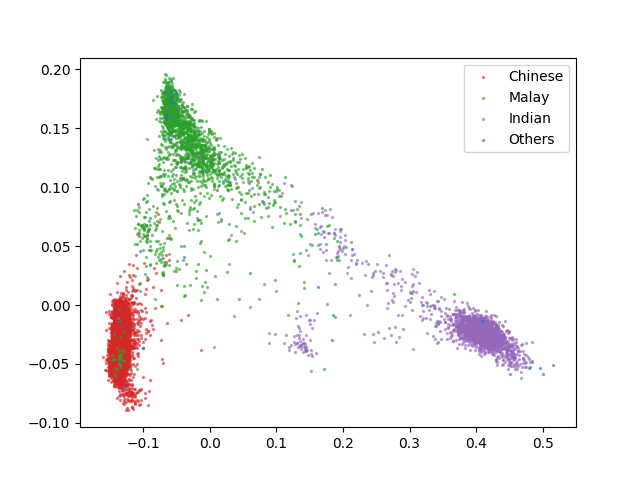

In [69]:
%matplot plt

In [71]:
# Extract data
df = ht_samples.select(ht_samples.grids_meta.hl_umap_scores, ht_samples.dgo_meta.sr_ethnicity).to_pandas()
# Clear plt
plt.clf()
plt.cla()
# Color map
palette={"Chinese": "#d62728", "Malay": "#2ca02c", "Indian": "#9467bd", "Others": "#1f77b4"}
# Compute the plot
fig, ax = plt.subplots()
for k,v in palette.items():
    df_f = df.loc[df['sr_ethnicity'] == k]
    x = [item[0] for item in df_f['hl_umap_scores']]
    y = [item[1] for item in df_f['hl_umap_scores']]
    ax.scatter(x, y, c=v, s=2, label=k, alpha=0.5)

ax.legend()

# plt.show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

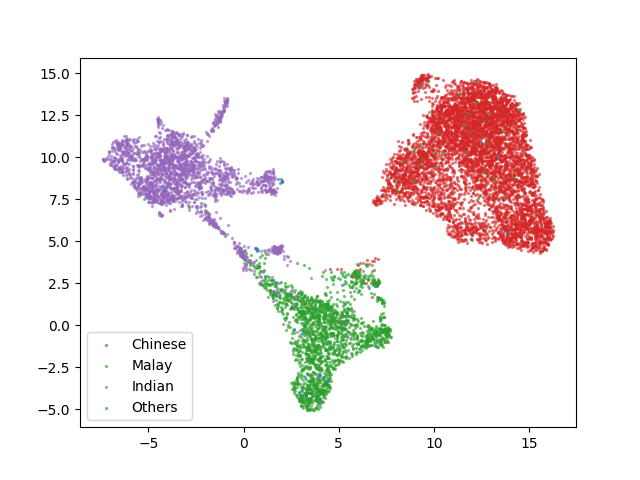

In [72]:
%matplot plt

## END